In [441]:
# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F

# For data preprocess
import numpy as np
import pandas as pd
import csv
import math
import pprint as pp

# For plotting
import matplotlib.pyplot as plt
import csv

from sklearn.model_selection import train_test_split

myseed = 42069 # set a random seed
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(myseed)
torch.manual_seed(myseed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(myseed)

In [442]:
# !gdown --id '1Wweg6vyFs2GbLzbi4CLA64cWb1gQafPA' --output covid.train_v2.csv
# !gdown --id '1VtQ8E3cy6gatnYPkJZ7f4BkLA7BmQhyd' --output covid.test_v2.csv
tr_path = 'covid.train_v2.csv'  # path to training data
tt_path = 'covid.test_v2.csv'   # path to testing data
df = pd.read_csv(tr_path)
test_df = pd.read_csv(tt_path)
combine_df = pd.concat([df, test_df])

test_df = test_df[test_df.columns[1:94]]
y = df[df.columns[94]] #train label
# df= df[df.columns[1:]]
x = df[df.columns[1:94]] #train data
# y = df[df.columns[94]] #train label


df.drop(['Unnamed: 0'],axis = 1, inplace = True) 
cols = list(df.columns)
df.iloc[:, 40:].corr()
# df.head()
# combine_df

,cli,ili,hh_cmnty_cli,nohh_cmnty_cli,wearing_mask,travel_outside_state,work_outside_home,shop,restaurant,spent_time,...,restaurant.2,spent_time.2,large_event.2,public_transit.2,anxious.2,depressed.2,felt_isolated.2,worried_become_ill.2,worried_finances.2,tested_positive.2
cli,1.000000,0.995964,0.898566,0.884825,-0.041109,-0.108554,-0.023719,-0.410049,-0.218932,-0.285385,...,-0.218734,-0.287585,-0.109055,-0.376405,0.197295,0.136825,0.149876,0.293384,0.607624,0.843786
ili,0.995964,1.000000,0.894180,0.879866,-0.044677,-0.123068,-0.023336,-0.404915,-0.218117,-0.284132,...,-0.218182,-0.286235,-0.109492,-0.366695,0.201564,0.140652,0.155572,0.286878,0.602892,0.836760
hh_cmnty_cli,0.898566,0.894180,1.000000,0.997314,0.013308,-0.077263,-0.018244,-0.507380,-0.320566,-0.359870,...,-0.322046,-0.358036,-0.177726,-0.437657,0.312277,0.231956,0.253804,0.396394,0.597475,0.881281
nohh_cmnty_cli,0.884825,0.879866,0.997314,1.000000,0.000295,-0.069135,0.000876,-0.500195,-0.309891,-0.347013,...,-0.311633,-0.344852,-0.166766,-0.431976,0.319301,0.243365,0.254033,0.391310,0.572399,0.871650
wearing_mask,-0.041109,-0.044677,0.013308,0.000295,1.000000,-0.202837,-0.742585,-0.692267,-0.783702,-0.801589,...,-0.783351,-0.799555,-0.888700,0.126970,0.329596,-0.058277,0.428821,0.838847,0.392912,-0.006452
travel_outside_state,-0.108554,-0.123068,-0.077263,-0.069135,-0.202837,1.000000,0.260297,0.217364,0.287735,0.332576,...,0.286511,0.317183,0.313682,-0.230106,-0.043026,0.016023,-0.397573,-0.103269,-0.109375,-0.093694
work_outside_home,-0.023719,-0.023336,-0.018244,0.000876,-0.742585,0.260297,1.000000,0.690912,0.749516,0.710041,...,0.740568,0.727932,0.780342,-0.080105,-0.093791,0.090513,-0.433688,-0.686708,-0.387033,-0.072272
shop,-0.410049,-0.404915,-0.507380,-0.500195,-0.692267,0.217364,0.690912,1.000000,0.834046,0.803776,...,0.822708,0.828558,0.783968,0.135619,-0.344946,-0.084939,-0.514382,-0.865705,-0.528254,-0.455479
restaurant,-0.218932,-0.218117,-0.320566,-0.309891,-0.783702,0.287735,0.749516,0.834046,1.000000,0.885079,...,0.994194,0.884772,0.909142,-0.025422,-0.397000,-0.088763,-0.650892,-0.842301,-0.500867,-0.239448
spent_time,-0.285385,-0.284132,-0.359870,-0.347013,-0.801589,0.332576,0.710041,0.803776,0.885079,1.000000,...,0.883899,0.986520,0.914396,-0.033836,-0.321858,0.060498,-0.540138,-0.861035,-0.581274,-0.326312


In [443]:
data_corr = df.iloc[:, 40:].corr()
target_col = data_corr['tested_positive.2']
target_col

cli                       0.843786
ili                       0.836760
hh_cmnty_cli              0.881281
nohh_cmnty_cli            0.871650
wearing_mask             -0.006452
travel_outside_state     -0.093694
work_outside_home        -0.072272
shop                     -0.455479
restaurant               -0.239448
spent_time               -0.326312
large_event              -0.115065
public_transit           -0.455680
anxious                   0.162637
depressed                 0.075098
felt_isolated             0.140575
worried_become_ill        0.321380
worried_finances          0.520439
tested_positive           0.982732
cli.1                     0.843655
ili.1                     0.835567
hh_cmnty_cli.1            0.880158
nohh_cmnty_cli.1          0.870427
wearing_mask.1           -0.005494
travel_outside_state.1   -0.096218
work_outside_home.1      -0.069591
shop.1                   -0.455528
restaurant.1             -0.237918
spent_time.1             -0.326274
large_event.1       

In [444]:
feature = target_col[target_col > 0.8] #選出相關性大於0.8的
feature_cols = feature.index.tolist()  #将被選擇的feature拿出來
feature_cols.pop() #去掉test_positive标签
pp.pprint(feature_cols) #feature list


['cli',
 'ili',
 'hh_cmnty_cli',
 'nohh_cmnty_cli',
 'tested_positive',
 'cli.1',
 'ili.1',
 'hh_cmnty_cli.1',
 'nohh_cmnty_cli.1',
 'tested_positive.1',
 'cli.2',
 'ili.2',
 'hh_cmnty_cli.2',
 'nohh_cmnty_cli.2']


In [445]:
feats_selected = [cols.index(col) for col in feature_cols]
feats_selected = [57, 58, 59, 60, 61, 75, 76, 77, 78, 79]

In [446]:

df = df.iloc[:,feats_selected]
# test_df = test_df.iloc[:,feats]
# df = df.iloc[:,77:81]
# cols
df.head()

,tested_positive,cli.1,ili.1,hh_cmnty_cli.1,nohh_cmnty_cli.1,tested_positive.1,cli.2,ili.2,hh_cmnty_cli.2,nohh_cmnty_cli.2
0,19.586492,0.838995,0.807767,25.679101,21.280270,20.151838,0.897802,0.887893,26.060544,21.503832
1,20.151838,0.897802,0.887893,26.060544,21.503832,20.704935,0.972842,0.965496,25.754087,21.016210
2,20.704935,0.972842,0.965496,25.754087,21.016210,21.292911,0.955306,0.963079,25.947015,20.941798
3,21.292911,0.955306,0.963079,25.947015,20.941798,21.166656,0.947513,0.968764,26.350501,21.109971
4,21.166656,0.947513,0.968764,26.350501,21.109971,19.896607,0.883833,0.893020,26.480624,21.003982


In [447]:
dfcolumns = pd.DataFrame(x.columns)
mean_std={}
# print(torch.cuda.is_available())
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
# Standardization Feature
for col in df.columns:
  print(col)
  mean_std[col] = (combine_df[col].mean(), combine_df[col].std())
  df[col] = (df[col] - mean_std[col][0]) / mean_std[col][1]

# Pandas to Numpy
x = df[df.columns].values
y = y.values

# Numpy to Tensor
x = torch.Tensor(x).cuda()
y = torch.Tensor(y).cuda()

cuda:0
tested_positive
cli.1
ili.1
hh_cmnty_cli.1
nohh_cmnty_cli.1
tested_positive.1
cli.2
ili.2
hh_cmnty_cli.2
nohh_cmnty_cli.2


<ipython-input-447-01263175ceb0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = (df[col] - mean_std[col][0]) / mean_std[col][1]


In [448]:
df.head()

,tested_positive,cli.1,ili.1,hh_cmnty_cli.1,nohh_cmnty_cli.1,tested_positive.1,cli.2,ili.2,hh_cmnty_cli.2,nohh_cmnty_cli.2
0,0.430175,-0.370311,-0.499054,-0.423894,-0.369839,0.496247,-0.238417,-0.317624,-0.391406,-0.352503
1,0.504194,-0.230334,-0.309870,-0.381898,-0.343361,0.568760,-0.059836,-0.134471,-0.425192,-0.410298
2,0.576610,-0.051715,-0.126645,-0.415638,-0.401114,0.645846,-0.101569,-0.140176,-0.403922,-0.419118
3,0.653592,-0.093457,-0.132352,-0.394398,-0.409927,0.629294,-0.120113,-0.126759,-0.359439,-0.399185
4,0.637062,-0.112005,-0.118930,-0.349975,-0.390009,0.462785,-0.271659,-0.305524,-0.345094,-0.411747


In [449]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(10, 64)
        self.bn1 = nn.BatchNorm1d(64) # 使用BatchNorm1d效果不好
        self.dropout1 = nn.Dropout(0.05) # 使用Dropout效果不好
        self.fc2 = nn.Linear(64, 16)
        self.bn2 = nn.BatchNorm1d(16) # 使用BatchNorm1d效果不好
        self.fc3 = nn.Linear(16, 1)

    def forward(self, x):
        x = self.fc1(x)
        # x = self.bn1(x)
        # x = self.dropout1(x)
        x = F.relu(x)
        x = self.fc2(x)
        # x = self.bn2(x)
        # x = self.dropout1(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x

In [450]:
network = Net()
network.cuda()
optimizer = torch.optim.Adam(network.parameters(), lr=7.5e-5, weight_decay=7e-3) 

In [451]:
epochs = 10000
batch_size = 256

train_losses = []
test_losses = []

# Early Stopping parameters
ES_patience = 200
ES_counter = 0 
best_epoch = 0
best_loss = 1000

In [452]:
def train(epoch):
  network.train()
  for i in range(len(x_train)//batch_size):
    optimizer.zero_grad()
    pred = network(x_train[batch_size*i:batch_size*(i+1)])
    loss = F.mse_loss(pred.view(-1), x_test[batch_size*i:batch_size*(i+1)])
    loss.backward()
    optimizer.step()

  train_losses.append(loss.item())

In [453]:
def test(epoch):
  global best_epoch, best_loss, ES_counter

  network.eval()
  with torch.no_grad():
    pred = network(y_train)
    loss = F.mse_loss(pred.view(-1), y_test)
    
  # Early Stopping
  if best_loss > loss:
    ES_counter, best_epoch, best_loss = 0, epoch, loss
    # Save best model
    torch.save(network.state_dict(), 'model.pth')
    print('Saving model (epoch = {:4d}, MSE loss = {:.4f})'.format(epoch, loss))
  else:
    ES_counter += 1
    if ES_counter == ES_patience:
      print('---Early Stopping--- (Best epoch = {:4d}, Best MSE loss = {:.4f})'.format(best_epoch, best_loss))
  # Early Stopping

  test_losses.append(loss.item())

In [454]:
for epoch in range(1, epochs+1):
  # Split into train/test
  x_train, y_train, x_test, y_test = train_test_split(x, y, test_size=0.1, random_state=epoch%10) # random_state=epoch%10 ：10-Flod
  
  train(epoch)
  test(epoch)
  if ES_counter == ES_patience:
    break

Saving model (epoch =    1, MSE loss = 282.8877)
Saving model (epoch =    3, MSE loss = 262.2568)
Saving model (epoch =   13, MSE loss = 258.5638)
Saving model (epoch =   23, MSE loss = 253.5223)
Saving model (epoch =   33, MSE loss = 247.4095)
Saving model (epoch =   43, MSE loss = 240.0357)
Saving model (epoch =   53, MSE loss = 231.0462)
Saving model (epoch =   63, MSE loss = 220.3732)
Saving model (epoch =   73, MSE loss = 207.9630)
Saving model (epoch =   80, MSE loss = 207.8949)
Saving model (epoch =   83, MSE loss = 193.9668)
Saving model (epoch =   90, MSE loss = 191.6124)
Saving model (epoch =   93, MSE loss = 178.3597)
Saving model (epoch =  100, MSE loss = 174.0138)
Saving model (epoch =  103, MSE loss = 161.8544)
Saving model (epoch =  110, MSE loss = 156.0108)
Saving model (epoch =  113, MSE loss = 145.2702)
Saving model (epoch =  120, MSE loss = 138.3882)
Saving model (epoch =  123, MSE loss = 129.3105)
Saving model (epoch =  128, MSE loss = 128.8947)
Saving model (epoch 

Text(0, 0.5, 'Loss')

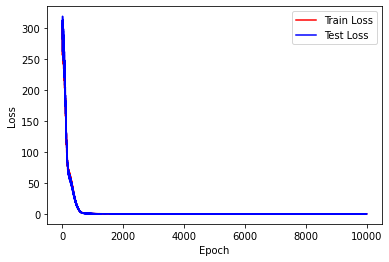

In [455]:
fig = plt.figure()
plt.plot(range(len(train_losses)), train_losses, color='red')
plt.plot(range(len(train_losses)), test_losses, color='blue')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [456]:
best_network = Net().cuda()
network_state_dict = torch.load('model.pth')
best_network.load_state_dict(network_state_dict)

<All keys matched successfully>

In [457]:
best_network.eval()
print(feats_selected)
test_df = test_df.iloc[:,feats_selected]

# Standardization Feature
for col in test_df.columns:
  test_df[col] = (test_df[col] - mean_std[col][0]) / mean_std[col][1]

test_X = test_df.values #Pandas to Numpy
test_X = torch.Tensor(test_X).cuda() #Numpy to Tensor
pred = best_network(test_X)

[57, 58, 59, 60, 61, 75, 76, 77, 78, 79]


<ipython-input-457-65c9d0fc41e5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[col] = (test_df[col] - mean_std[col][0]) / mean_std[col][1]


In [458]:
print('Saving results')
with open('submission.csv', "w") as fp:
    writer = csv.writer(fp)
    writer.writerow(['id', 'tested_positive'])
    for i, p in enumerate(pred):
        writer.writerow([i, p.item()])

Saving results
